In [77]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [78]:
data=pd.read_csv('seattle_weather.csv',parse_dates=['date'])

In [79]:
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [80]:
data.shape

(1461, 6)

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [82]:
data.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [83]:
data.nunique()

date             1461
precipitation     111
temp_max           67
temp_min           55
wind               79
weather             5
dtype: int64

In [199]:
data.weather.unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

In [110]:
data['month']=data['date'].dt.month
#data['day']=data['date'].dt.day
data['year']=data['date'].dt.year
#data['week'] = data['date'].dt.isocalendar().week
data['quarter']=data['date'].dt.quarter

<Axes: xlabel='month', ylabel='count'>

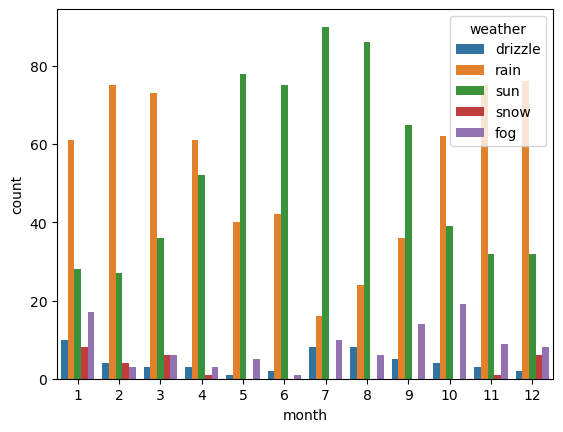

In [85]:
sns.countplot(data,x='month',hue='weather')

<Axes: xlabel='quarter', ylabel='count'>

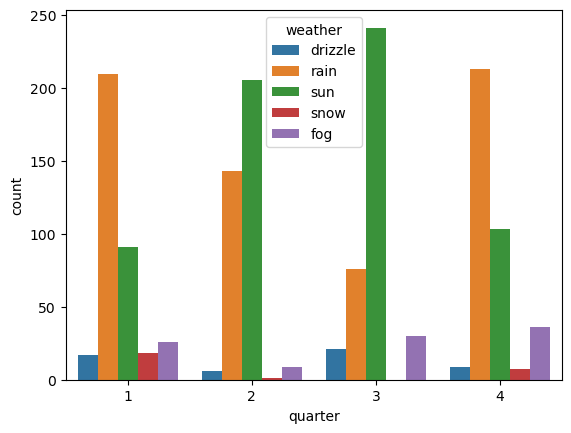

In [111]:
sns.countplot(data,x='quarter',hue='weather')

<Axes: xlabel='year', ylabel='count'>

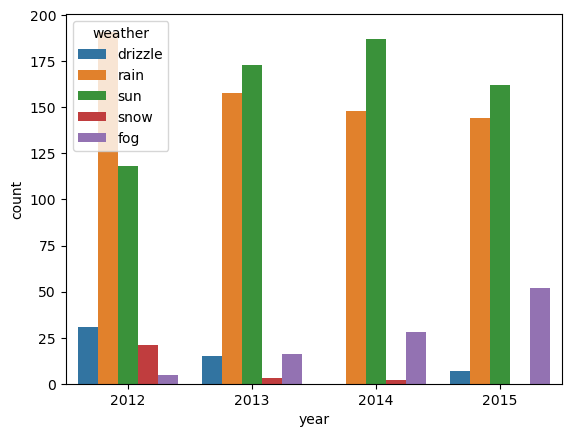

In [86]:
sns.countplot(data,x='year',hue='weather')

<Axes: xlabel='month', ylabel='average_temp'>

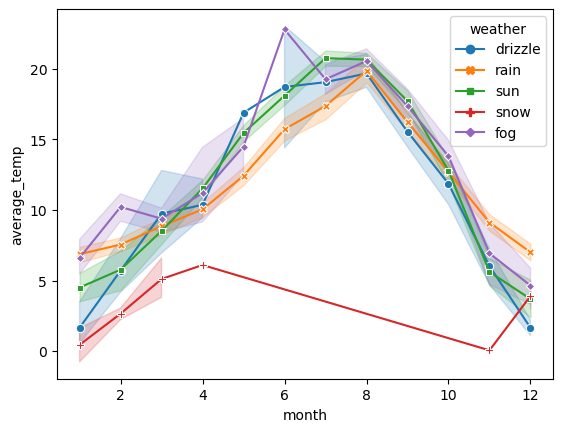

In [89]:
data['average_temp']=(data['temp_max']+data['temp_min'])/2

sns.lineplot(data,x='month',y='average_temp',hue='weather',style='weather',markers=True, dashes=False)

<Axes: xlabel='month', ylabel='wind'>

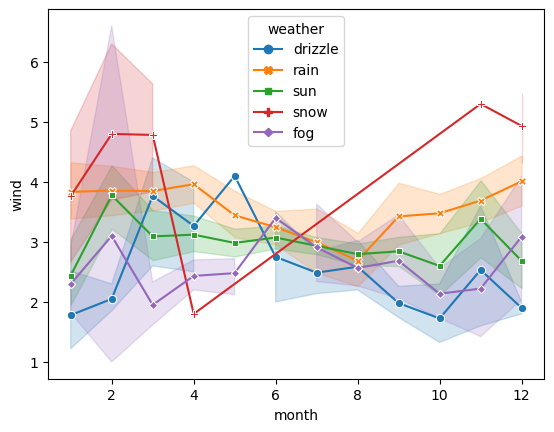

In [90]:
data['average_temp']=(data['temp_max']+data['temp_min'])/2

sns.lineplot(data,x='month',y='wind',hue='weather',style='weather',markers=True, dashes=False)

In [94]:
data.head(1)

,date,precipitation,temp_max,temp_min,wind,weather,month,year,average_temp
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,1,2012,8.9


In [ ]:
#checking class weightage
data.weather.value_counts().plot(kind='pie',autopct='%.2f')

Text(0.5, 1.0, 'Average Temprature')

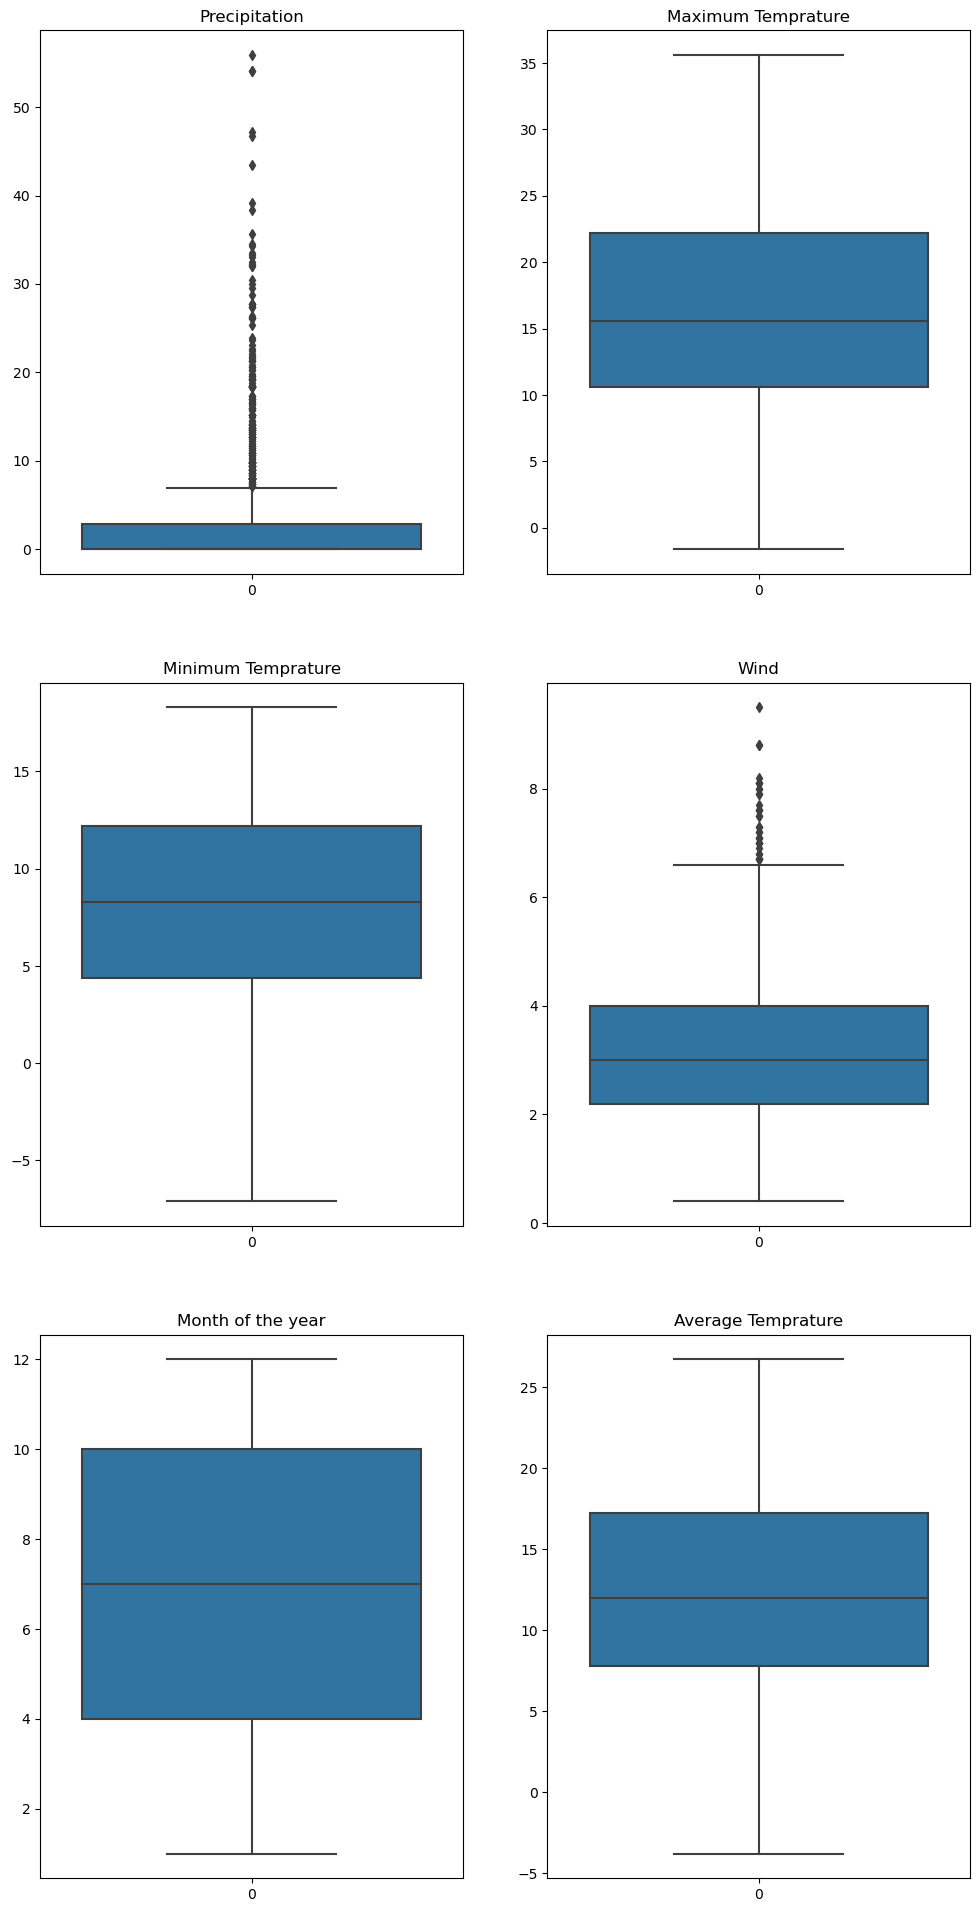

In [65]:
fig,axes=plt.subplots(3,2,figsize=(12,24))

sns.boxplot(data['precipitation'],ax=axes[0,0])
axes[0,0].set_title('Precipitation')

sns.boxplot(data['temp_max'],ax=axes[0,1])
axes[0,1].set_title('Maximum Temprature')

sns.boxplot(data['temp_min'],ax=axes[1,0])
axes[1,0].set_title('Minimum Temprature')


sns.boxplot(data['wind'],ax=axes[1,1])
axes[1,1].set_title('Wind')


sns.boxplot(data['month'],ax=axes[2,0])
axes[2,0].set_title('Month of the year')

sns.boxplot(data['average_temp'],ax=axes[2,1])
axes[2,1].set_title('Average Temprature')

C:\Users\amanc\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


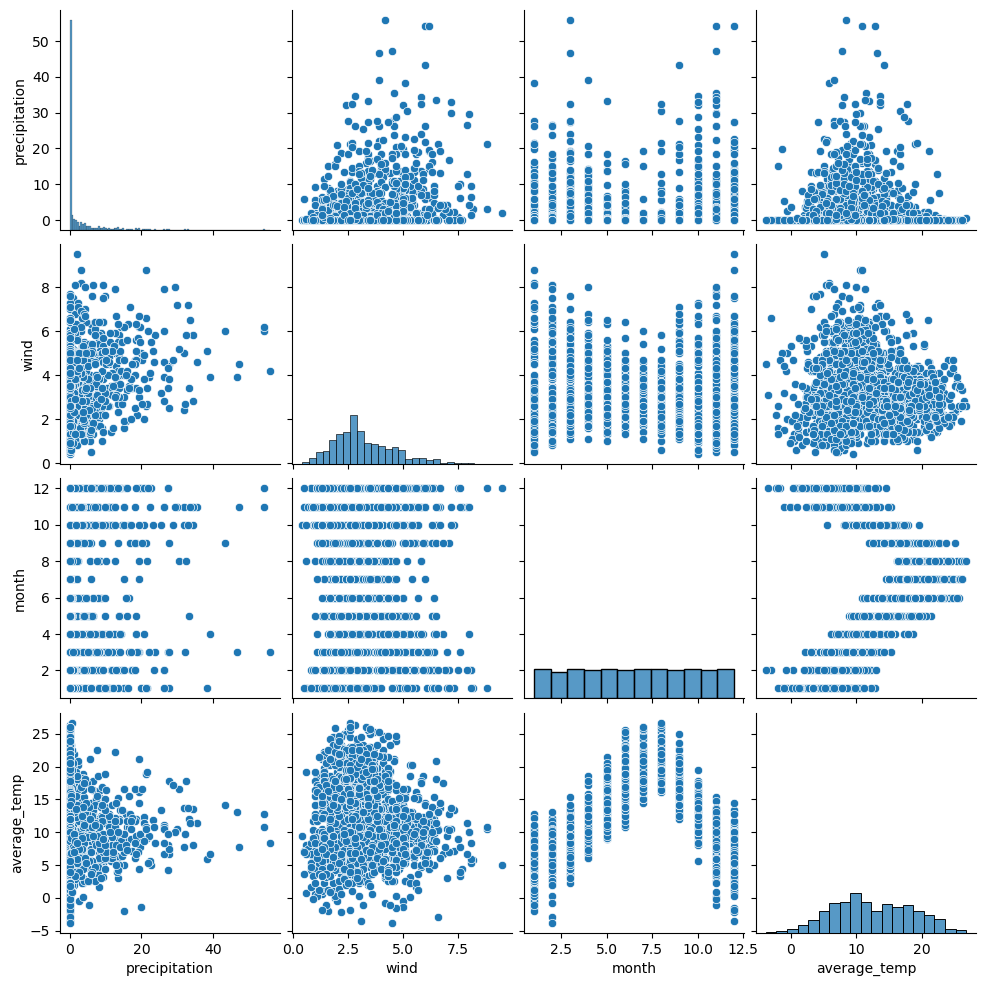

In [113]:
data1=data.drop(['date','temp_max','temp_min','year','quarter'],axis=1)
sns.pairplot(data1)

Text(0.5, 1.0, 'Temprature QQ plot')

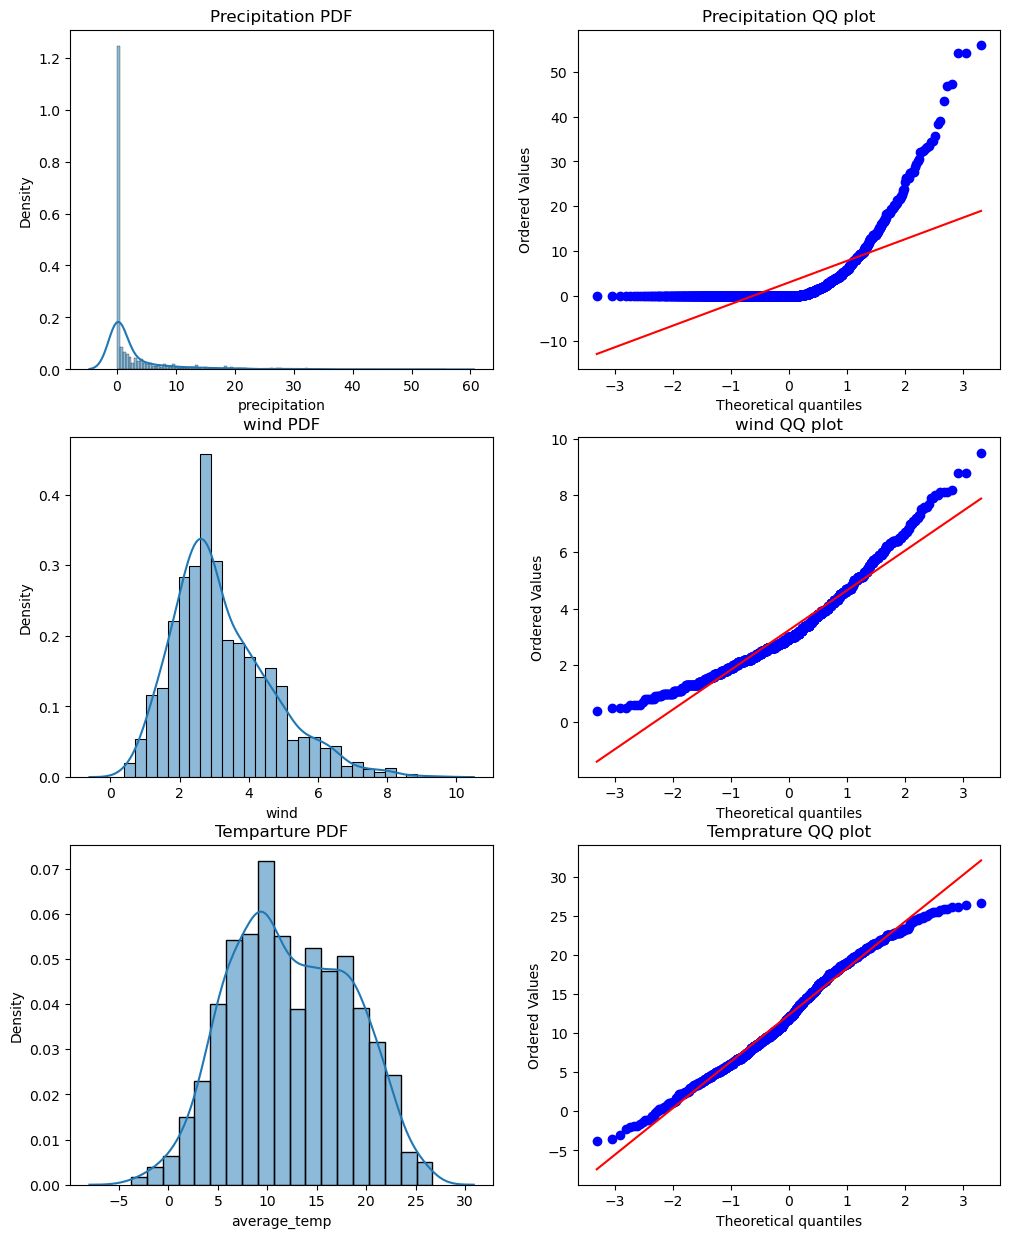

In [109]:
fig,axes=plt.subplots(3,2,figsize=(12,15))

sns.histplot(data1['precipitation'],ax=axes[0,0],stat='density',kde=True,kde_kws={'cut':3})
axes[0,0].set_title('Precipitation PDF')
stats.probplot(data1['precipitation'],dist='norm',plot=axes[0,1])
axes[0,1].set_title('Precipitation QQ plot')



sns.histplot(data1['wind'],ax=axes[1,0],stat='density',kde=True,kde_kws={'cut':3})
axes[1,0].set_title('wind PDF')
stats.probplot(data1['wind'],dist='norm',plot=axes[1,1])
axes[1,1].set_title('wind QQ plot')


sns.histplot(data1['average_temp'],ax=axes[2,0],stat='density',kde=True,kde_kws={'cut':3})
axes[2,0].set_title('Temparture PDF')
stats.probplot(data1['average_temp'],dist='norm',plot=axes[2,1])
axes[2,1].set_title('Temprature QQ plot')



In [214]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,PowerTransformer,PolynomialFeatures,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

In [124]:
data1.head(1)

,precipitation,wind,weather,month,average_temp
0,0.0,4.7,drizzle,1,8.9


In [115]:
#Train Test split
x_train,x_test,y_train,y_test=train_test_split(data1.drop(['weather'],axis=1),data1['weather'],test_size=0.2,random_state=42)

In [205]:
x_train.head(3)

,precipitation,wind,month,average_temp
1066,0.0,5.7,12,1.20
638,18.5,6.3,9,11.95
799,18.8,2.2,3,9.15


In [133]:
le=LabelEncoder()

In [134]:
y_train_label=le.fit_transform(y_train)
y_test_label=le.transform(y_test)

In [202]:
y_test_label

array([4, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 4, 2, 4, 1, 2, 4, 1, 1, 4, 2, 2,
       2, 4, 1, 2, 4, 4, 1, 4, 2, 4, 4, 3, 4, 2, 2, 2, 2, 4, 2, 4, 1, 4,
       4, 2, 2, 4, 2, 4, 4, 2, 4, 2, 4, 2, 2, 4, 2, 4, 2, 4, 3, 4, 4, 0,
       2, 4, 2, 2, 2, 1, 4, 2, 2, 4, 2, 4, 2, 3, 2, 0, 2, 4, 2, 4, 0, 2,
       1, 2, 2, 4, 4, 2, 2, 4, 4, 2, 4, 2, 4, 4, 2, 3, 2, 4, 4, 2, 4, 2,
       2, 4, 2, 2, 0, 1, 4, 4, 4, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 1, 4, 2, 2, 2, 4, 0, 4, 2, 2, 0, 1, 4, 2, 4, 4, 2, 4, 4, 4,
       2, 2, 1, 4, 2, 2, 4, 4, 2, 4, 4, 2, 2, 4, 4, 4, 2, 2, 1, 4, 2, 2,
       4, 4, 4, 2, 4, 4, 4, 2, 2, 2, 2, 2, 4, 4, 0, 1, 4, 2, 1, 4, 1, 2,
       3, 2, 2, 4, 0, 2, 4, 2, 2, 4, 2, 4, 2, 4, 4, 4, 2, 4, 4, 4, 2, 4,
       2, 4, 4, 4, 1, 2, 4, 2, 4, 2, 4, 2, 4, 4, 2, 4, 4, 4, 0, 1, 3, 2,
       4, 3, 4, 4, 4, 4, 2, 2, 2, 2, 2, 1, 4, 1, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 4, 4, 4, 4, 2, 4, 4, 2, 3, 4, 4, 1, 2, 4, 4, 4, 4,
       2, 4, 4, 2, 1, 2, 4])

In [203]:
le.classes_

array(['drizzle', 'fog', 'rain', 'snow', 'sun'], dtype=object)

In [293]:
trf1=ColumnTransformer([
    ('pt',PowerTransformer(method='yeo-johnson'),[1,3])
],remainder='passthrough')

In [294]:
trf2=ColumnTransformer([
    ('scale',StandardScaler(),slice(0,4))
],remainder='passthrough')

In [295]:
pipe=make_pipeline(trf1,trf2)

In [296]:
x_train1=pipe.fit_transform(x_train)
x_test1=pipe.transform(x_test)

In [297]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier,StackingClassifier,BaggingClassifier,RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

<Axes: ylabel='count'>

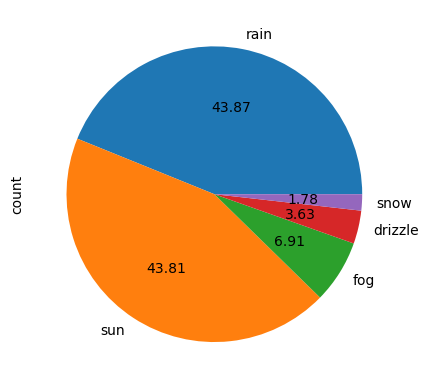

In [298]:
data.weather.value_counts().plot(kind='pie',autopct='%.2f')

In [304]:
#array(['drizzle', 'fog', 'rain', 'snow', 'sun'],

In [409]:
lr=LogisticRegression(multi_class='multinomial',penalty='l1',solver='saga',max_iter=500,class_weight={0:5,1:5,2:1,3:6,4:1})
lr.fit(x_train1,y_train_label)
y_pred_lr=lr.predict(x_test1)
print(accuracy_score(y_test_label,y_pred_lr))
confusion_matrix(y_test_label,y_pred_lr)

0.7918088737201365


C:\Users\amanc\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


array([[  1,   3,   0,   0,   5],
       [  3,  10,   0,   0,  12],
       [  1,   3, 102,   4,  10],
       [  0,   0,   3,   5,   0],
       [  2,  13,   0,   2, 114]], dtype=int64)

In [302]:
xgb=XGBClassifier(n_estimators=200,learning_rate=1,gamma=3)
xgb.fit(x_train1,y_train_label)
y_pred_xgb=xgb.predict(x_test1)
print(accuracy_score(y_test_label,y_pred_xgb))
confusion_matrix(y_test_label,y_pred_xgb)

0.8327645051194539


array([[  0,   0,   0,   0,   9],
       [  0,   0,   0,   0,  25],
       [  0,   0, 111,   1,   8],
       [  0,   0,   6,   2,   0],
       [  0,   0,   0,   0, 131]], dtype=int64)

In [303]:
rf=RandomForestClassifier()
rf.fit(x_train1,y_train_label)
y_pred_rf=rf.predict(x_test1)
print(accuracy_score(y_test_label,y_pred_rf))
confusion_matrix(y_test_label,y_pred_rf)

0.825938566552901


array([[  2,   0,   0,   0,   7],
       [  0,   8,   1,   0,  16],
       [  0,   1, 110,   2,   7],
       [  0,   0,   6,   2,   0],
       [  2,   8,   1,   0, 120]], dtype=int64)

In [404]:
svm=SVC(kernel='linear',degree=3)
svm.fit(x_train1,y_train_label)
y_pred_svm=svm.predict(x_test1)
print(accuracy_score(y_test_label,y_pred_svm))
confusion_matrix(y_test_label,y_pred_svm)

0.7781569965870307


array([[  0,   0,   0,   0,   9],
       [  0,   0,   0,   0,  25],
       [  0,   0,  97,   0,  23],
       [  0,   0,   7,   0,   1],
       [  0,   0,   0,   0, 131]], dtype=int64)

In [394]:
naive=GaussianNB()
naive.fit(x_train1,y_train_label)
y_pred_naive=naive.predict(x_test1)
print(accuracy_score(y_test_label,y_pred_naive))
confusion_matrix(y_test_label,y_pred_naive)

0.8361774744027304


array([[  1,   0,   0,   0,   8],
       [  0,   0,   0,   0,  25],
       [  0,   0, 112,   0,   8],
       [  0,   0,   7,   1,   0],
       [  0,   0,   0,   0, 131]], dtype=int64)

In [354]:
knn=KNeighborsClassifier()
knn.fit(x_train1,y_train_label)
y_pred_knn=knn.predict(x_test1)
print(accuracy_score(y_test_label,y_pred_knn))
confusion_matrix(y_test_label,y_pred_knn)

0.6757679180887372


array([[ 1,  0,  1,  0,  7],
       [ 0,  8,  4,  0, 13],
       [ 1,  6, 90,  0, 23],
       [ 0,  0,  5,  0,  3],
       [ 2,  6, 24,  0, 99]], dtype=int64)

In [365]:
mlp=MLPClassifier(max_iter=2000,learning_rate_init=0.01)
mlp.fit(x_train1,y_train_label)
y_pred_mlp=mlp.predict(x_test1)
print(accuracy_score(y_test_label,y_pred_mlp))
confusion_matrix(y_test_label,y_pred_mlp)

0.8327645051194539


array([[  1,   0,   0,   0,   8],
       [  0,   6,   0,   0,  19],
       [  0,   1, 110,   2,   7],
       [  0,   0,   7,   1,   0],
       [  0,   5,   0,   0, 126]], dtype=int64)

In [372]:
bc=BaggingClassifier(estimator=DecisionTreeClassifier(),n_estimators=250,n_jobs=-1,random_state=42)
bc.fit(x_train1,y_train_label)
y_pred_bc=bc.predict(x_test1)
print(accuracy_score(y_test_label,y_pred_bc))
confusion_matrix(y_test_label,y_pred_bc)

0.8122866894197952


array([[  2,   1,   0,   0,   6],
       [  0,   8,   0,   0,  17],
       [  0,   0, 109,   3,   8],
       [  0,   0,   5,   3,   0],
       [  4,  10,   1,   0, 116]], dtype=int64)

In [410]:
estimator=[('lr',lr),('xgb',xgb),('rf',rf),('naive',naive),('mlp',mlp),('bc',bc)]

In [420]:
sc=StackingClassifier(estimators=estimator,final_estimator=XGBClassifier(n_estimators=200,learning_rate=0.01,gamma=3),cv=5,n_jobs=-1)
sc.fit(x_train1,y_train_label)
y_pred_sc=sc.predict(x_test1)
print(accuracy_score(y_test_label,y_pred_sc))
confusion_matrix(y_test_label,y_pred_sc)

0.8327645051194539


array([[  0,   0,   0,   0,   9],
       [  0,   0,   0,   0,  25],
       [  0,   0, 110,   2,   8],
       [  0,   0,   5,   3,   0],
       [  0,   0,   0,   0, 131]], dtype=int64)

In [443]:
vc=VotingClassifier(estimators=estimator,voting='hard',n_jobs=-1)
vc.fit(x_train1,y_train_label)
y_pred_vc=vc.predict(x_test1)
print(classification_report(y_test_label,y_pred_vc))

              precision    recall  f1-score   support

           0       1.00      0.11      0.20         9
           1       0.57      0.16      0.25        25
           2       0.94      0.93      0.94       120
           3       1.00      0.12      0.22         8
           4       0.78      0.98      0.86       131

    accuracy                           0.84       293
   macro avg       0.86      0.46      0.49       293
weighted avg       0.84      0.84      0.80       293



Text(50.722222222222214, 0.5, 'Actual')

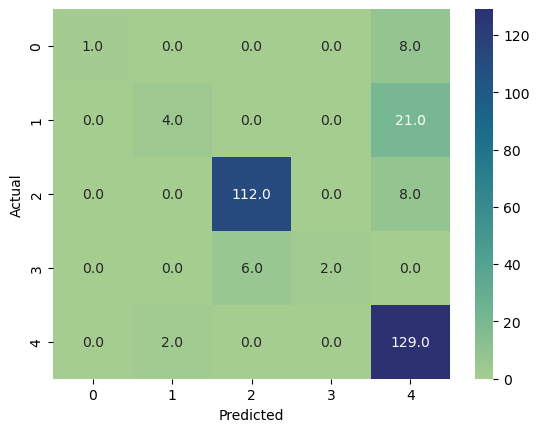

In [417]:
cm=confusion_matrix(y_test_label,y_pred_vc)
sns.heatmap(cm,annot=True,cmap='crest',fmt='.1f')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [434]:
from sklearn.model_selection import cross_val_score
cv=cross_val_score(vc,x_train1,y_train_label,cv=5,n_jobs=-1,scoring='accuracy').mean()
print('Cross Validation Score',cv)

Cross Validation Score 0.8493415501999193


In [435]:
cross_val_score(vc,x_train1,y_train_label,cv=5,n_jobs=-1,scoring='accuracy')

array([0.85470085, 0.82051282, 0.82051282, 0.86266094, 0.87124464])

## Voting Classifier Performed Better with around 84.93% 